
## Análise Exploratória - Métricas


In [3]:
# Conectando na base de Dados: 
import mysql.connector

cnx = mysql.connector.connect(user='leticia.glass', password='dQ4P9V$RoN9ebgr',
                              host='data-case-db.ctxdyrkhld9x.us-east-1.rds.amazonaws.com',
                              database='warren')

In [4]:
# Importando as bibliotecas necessárias para as análises e construção de gráficos
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [5]:
# Visualizando as tabelas da base de dados: 
customers = pd.read_sql_query(r"""
    SELECT * FROM Customers
    """, 
    cnx
    )

customers.head(10)

,CustomerApiid,CustomerId,AUM,RegisterDate,AmountFirstDeposit,TotalDeposits,TotalWithdrawals,MonthlyIncome,FinancialInvestmentsValue,Age,ComputedRiskTolerance
0,60a7d0011363ea0011d0eb80,192260,601.525833,2021-06-10 21:23:31,100.013269,5,0,250.0,3000.0,14,22.22
1,60c77e1ffdaebd001875353e,192853,1798.831206,2021-06-14 16:13:56,300.048411,2,0,8000.0,180000.0,35,77.78
2,588f45ae0a760bb65b380afa,11897,1621.043680,2017-09-14 12:08:06,2500.000000,13,2,4500.0,0.0,32,17.00
3,5915d73623d4b1881694e11e,12583,78643.814178,2017-09-25 15:44:40,2005.000000,37,7,18000.0,120000.0,34,69.17
4,591f5f3b3daa47c6488bce3f,5564,422.691159,2017-05-22 18:38:05,2000.000000,23,7,2000.0,45000.0,29,0.00
5,5966a3dc3d3c271d31a9e17f,7597,1703.689481,2017-07-13 15:11:03,1000.000000,52,30,8800.0,0.0,31,15.50
6,59fa4a0b7553e32694677234,16185,3237.225992,2017-11-06 17:18:00,4800.000000,48,17,3150.0,0.0,31,15.00
7,5a12d0c07a8a363308626995,136072,0.000000,2020-05-25 18:20:13,250.000000,10,6,2500.0,0.0,22,11.50
8,5a16d2947a8a363308646458,35402,27880.571845,2018-03-26 14:52:16,500.000000,47,15,7150.0,0.0,28,26.00
9,5a21fe6bcb940a6cea0a9c89,21478,206184.528952,2017-12-05 12:55:15,200.000000,93,5,16000.0,200000.0,38,24.00


In [6]:
transactions = pd.read_sql_query(r"""
    SELECT * FROM Transactions
    """, 
    cnx
    )

In [7]:
# Ordenando os dados a partir da data
transactions = transactions.sort_values(by="OperatedAt")

In [8]:
# Verificando as datas de início e fim do df 
transactions.tail(10)

,Id,Direction,Amount,CustomerId,OperatedAt
159556,1895740,10,1000.0,144730,2021-07-13 00:00:00
157877,1894460,10,100.0,144233,2021-07-13 00:00:00
161457,1897216,10,6360.0,63576,2021-07-13 00:00:00
163244,1898864,10,1000.0,137444,2021-07-13 00:00:00
162482,1898282,10,110.0,97727,2021-07-13 00:00:00
157884,1894461,10,1000.0,166757,2021-07-13 00:00:00
159244,1895544,10,100.0,41916,2021-07-13 00:00:00
162451,1898265,10,1500.0,75777,2021-07-13 00:00:00
162608,1898384,10,500.0,191361,2021-07-13 00:00:00
163722,1869082,10,500.0,189524,2021-07-13 00:43:37


In [9]:
transactions.head(10)

,Id,Direction,Amount,CustomerId,OperatedAt
260,1193306,10,12800.0,12431,2021-01-01 00:00:30
573,1200034,10,20000.0,117985,2021-01-01 00:01:33
452,1198402,10,50.0,95724,2021-01-01 00:02:08
521,1199295,10,200.0,136323,2021-01-01 00:02:35
486,1198878,10,2000.0,138207,2021-01-01 00:02:58
442,1198295,10,300.0,116255,2021-01-01 00:04:00
346,1195804,10,100.0,16655,2021-01-01 00:04:16
467,1198751,10,600.0,86678,2021-01-01 00:04:44
408,1197389,10,6000.0,39685,2021-01-01 00:05:36
555,1199823,10,50.0,148881,2021-01-01 00:05:41


In [10]:
# Ainda visualizando as bases de dados
events = pd.read_sql_query(r"""
    SELECT * FROM Events
    """, 
    cnx
    )

events.head(10)

,EventDate,Platform,CustomerApiid
0,20210112,IOS,5eb045b00d281d0010993b19
1,20210112,IOS,5d54036d7a4e2a00129ac685
2,20210112,IOS,5f160ad08df61f00175d4a94
3,20210112,IOS,5e1f7e25a6a96a0010ee1545
4,20210112,IOS,5e66a9a9e7bbca00119eb5fc
5,20210112,IOS,587f52fa8d72add918f62a38
6,20210112,IOS,5a71c28d4e68a177834a82dd
7,20210112,IOS,59e208138610ac0555c879d7
8,20210112,IOS,5bf6b4248149ba000f9c616d
9,20210112,IOS,5fac36cd2b11830017d474f7


In [11]:
# Investigando os dados, verificando tamanho e missing values 
customers.shape

(27161, 11)

In [12]:
customers.isna().any()

CustomerApiid                False
CustomerId                   False
AUM                          False
RegisterDate                 False
AmountFirstDeposit           False
TotalDeposits                False
TotalWithdrawals             False
MonthlyIncome                False
FinancialInvestmentsValue    False
Age                          False
ComputedRiskTolerance        False
dtype: bool

In [13]:
transactions.shape

(167864, 5)

In [14]:
transactions.isna().any()

Id            False
Direction     False
Amount        False
CustomerId    False
OperatedAt    False
dtype: bool

In [15]:
events.shape

(1103019, 3)

In [16]:
events.isna().any()

EventDate        False
Platform         False
CustomerApiid    False
dtype: bool

##### Qual o volume de dinheiro que está entrando/saindo da Warren hoje e como se compara aos períodos passados? Qual a previsão para os próximos meses?

In [17]:
# Selecionando os dados necessários para essa análise
transactions_volum = pd.read_sql_query(r"""
                                        SELECT Direction, MONTH(OperatedAt) as Mês, 
                                            SUM(Amount) AS Volume_Transações
                                        FROM Transactions
                                        GROUP BY Mês, Direction
                                        ORDER BY Mês ASC
                                        
""", cnx)

In [18]:
# Armazenando em um Dataframe e arrumando os dados
tt = pd.DataFrame(transactions_volum)
tt["Volume_Transações"] = tt["Volume_Transações"].round(2)

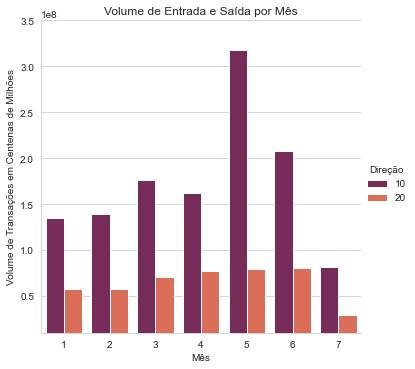

In [19]:
# Construindo um gráfico de barras que reúna essas informações
sns.set_style("whitegrid")
g = sns.catplot(kind="bar", data=tt, x="Mês", y="Volume_Transações", hue="Direction", 
                    palette="rocket", orient="v")
plt.ylim(1 * 1e+07, 35 * 1e+07)
g.set_axis_labels("Mês", "Volume de Transações em Centenas de Milhões")
g.legend.set_title("Direção")
plt.title("Volume de Entrada e Saída por Mês")
plt.show()

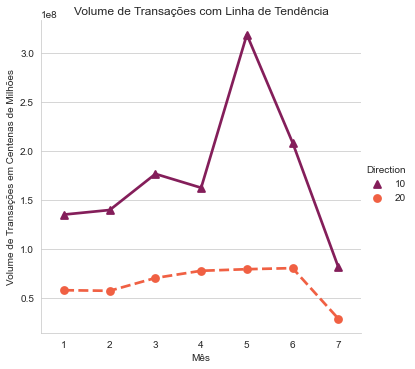

In [20]:
# Construíndo um gráfico de dispersão que mostre a linha de tendência
g2 = sns.catplot(x="Mês", y="Volume_Transações", hue="Direction",
            palette="rocket",
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=tt)
plt.xlabel("Mês")
plt.ylabel("Volume de Transações em Centenas de Milhões")
plt.title("Volume de Transações com Linha de Tendência")
plt.show()

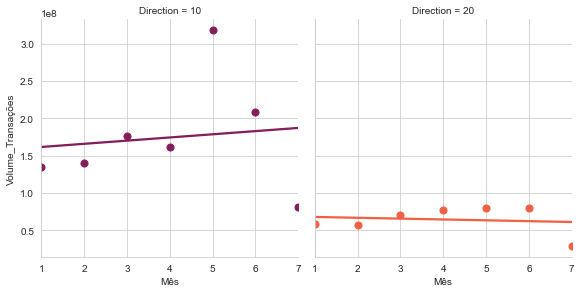

In [21]:
# Grafico de Dispersão com linha de tendência para cada uma das operações em separado
g3 = sns.lmplot(x="Mês", y="Volume_Transações", col="Direction", hue="Direction", data=tt,
           col_wrap=2, ci=None, palette="rocket", height=4,
           scatter_kws={"s": 50, "alpha": 1})
plt.show()

O mês de julho apenas tem dados até o dia 13, nesse sentido podemos selecionar os primeiros 13 dias de cada mês e repetir as análises anteriores, para fins de comparação;

In [22]:
# Selecionando as transações que ocorrem nos primeiros 13 dias de cada mês para comparação com 
# o mês de julho
transactions_volumm = pd.read_sql_query(r"""
                                        SELECT Direction, MONTH(OperatedAt) AS Mês, 
                                            DAYOFMONTH(OperatedAt) AS dia, SUM(Amount) as Volume_Transações 
                                        FROM Transactions
                                        WHERE DAYOFMONTH(OperatedAt) BETWEEN 01 AND 13 
                                        GROUP BY Mês, Direction
                                        ORDER BY Mês ASC
                                        
""", cnx)

In [23]:
# Adicionando a consulta em um Dataframe
ttm = pd.DataFrame(transactions_volumm)

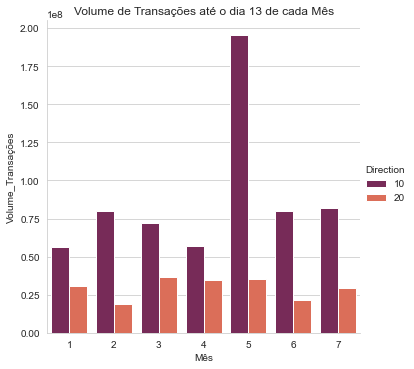

In [24]:
# Construindo os mesmos gráficos para o novo df
sns.set_style("whitegrid")
g4 = sns.catplot(kind='bar', data=ttm, x="Mês", y="Volume_Transações", hue="Direction", palette="rocket", legend=True)
g.despine(left=True)
g.set_axis_labels("Mês", "Volume de Transações")
g.legend.set_title("Direção")
plt.title("Volume de Transações até o dia 13 de cada Mês")
plt.show()

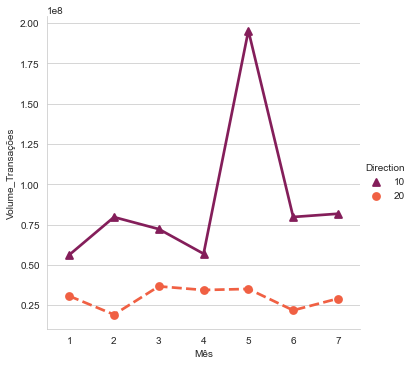

In [25]:
g5 = sns.catplot(x="Mês", y="Volume_Transações", hue="Direction",
            palette="rocket",
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=ttm)
plt.show()

Por esses gráficos podemos ver que nesse mês o total de entradas e saídas está menor que nos meses anteriores, mas temos que considerar que para o mês 7 temos apenas registros até o dia 13. Nesse sentido, podemos pensar que haverão o dobro de transações ainda nesse mês. 
O mês de maio foi um mês atípico, mantendo o número de saques, mas aumentando bastante o número de depósitos. 

Se analisarmos os gráficos de tendência, podemos ver que a linha de tendência está crescendo um pouco nas entradas e descrecendo muito levemente nas saídas. Ou seja, para os próximos meses podemos esperar resultados parecidos com dos meses passados (sem contar maio).

Os gráficos com resultados de Entrada e Saída apenas até o dia 13 de cada mês, confirmam essa conclusão. 

##### Quanto estamos crescendo relativo ao valor que já possuímos dentro da Warren? Esse crescimento está em alta/baixa? Qual a tendência atual?

In [26]:
# Fazendo a consulta dos dados que respondam essa questão, somando todo valor dentro da Warren
aum_query = pd.read_sql_query(r"""
                                SELECT SUM(AUM) AS Valor_Total
                                FROM Customers
""", cnx)

In [27]:
# Visualizando o valor total calculado
aum_query

,Valor_Total
0,2.691089e+09


In [28]:
# Somando o valor que clientes cadastrados em 2021 tem na Warren
# Ou seja, valor obtido esse ano
aum_2021 = pd.read_sql_query(r"""
                                SELECT SUM(AUM) AS Valor_2021
                                FROM Customers
                                WHERE YEAR(RegisterDate) = 2021
""", cnx)

In [29]:
aum_2021

,Valor_2021
0,4.825127e+08


In [30]:
# Dividimos o valor total pelo valor somado esse ano
# Lembrando que o somado apenas dos clientes que se cadastraram esse ano e não total desse ano
2.691089e+09 / (4.825127e+08)

5.577239728612325

In [31]:
# Supondo que o restante de 2021 arrecadasse o mesmo que a primeira metade
2.691089e+09 / (2*4.825127e+08)

2.7886198643061624

Selecionando os clientes que fizeram seu registro em 2021 e somando as quantias que esses clientes tem detro da Warren temos que, em meio ano, o montante é mais de 1/5 da montante total. Como os dados de 2021 representam apenas 6 meses e meio, temos que, em meio ano foi arrecadado mais de 1/5 do total de 5 anos somados. Supondo que o restante do ano fosse igual a primeira metade, teríamos entre 1/3 e 1/2 do total (5 anos) em apenas 1  ano. Destacando ainda que o valor de 2021 é maior que esse, pois as pessoas que se cadastraram nos outros anos também acumularam dinheiro em 2021 que não aparece nessa soma. Esse calculo é apenas uma estimativa para mostrar o crescimento nesse ano.
Ou seja, o crescimento está em alta. 

In [32]:
# Podemos calcular ainda, a diferença entre saques e depósitos, para mostrar o quanto dinheiro está ainda
# dentro da empresa, corroborando os gráficos da primeira questão; 
deposits_total = pd.read_sql_query(r"""
                                SELECT SUM(Amount)
                                FROM Transactions
                                WHERE Direction = 10
""", cnx)

In [33]:
deposits_total

,SUM(Amount)
0,1.221615e+09


In [34]:
saques_total = pd.read_sql_query(r"""
                                SELECT SUM(Amount)
                                FROM Transactions
                                WHERE Direction = 20
""", cnx)

In [35]:
saques_total

,SUM(Amount)
0,4.526163e+08


In [36]:
transactions_liquid = 1.221615e+09 - 4.526163e+08

In [37]:
transactions_liquid

768998700.0

##### Qual público está entrando na warren nos últimos tempos (idade, renda, investimentos)

In [38]:
# Selecionando os dados e salvando em um df
customers_selec = pd.read_sql_query(r"""
                            SELECT MonthlyIncome AS Renda, 
                                FinancialInvestmentsValue AS Investimentos, Age AS Idade
                            FROM Customers
                            WHERE YEAR(RegisterDate) = 2021
""", cnx)

In [39]:
cdf = pd.DataFrame(customers_selec)

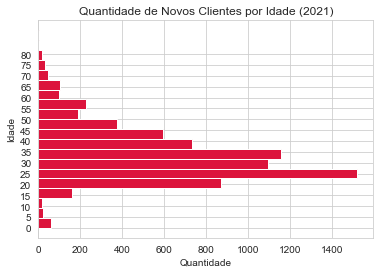

In [40]:
# Plotando um gráfico que mostre o público por idade, no ano de 2021
g6 = plt.figure()
plt.hist(data=cdf, x="Idade", density=False, bins=20, orientation="horizontal", color="crimson")
plt.xlabel("Quantidade")
plt.ylabel("Idade")
plt.title("Quantidade de Novos Clientes por Idade (2021)")
plt.yticks(np.arange(0, 85, step=5))
plt.show()

Aparecem alguns investidores com a idade entre 0 e 5 anos! Isso pode indicar um erro, no sentido de, o campo de idade não foi preenchido e para não haverem missing values na tabela, as lacunas foram preenchidas com zero. Sendo assim, temos duas opções de tratamento desse dado, cortá-lo da análise, ou substituí-lo pela média dos valores de idade. Nesse caso, como são poucos valores, iremos cortá-los da análise. 

In [41]:
# Repetindo a análise dessa vez separando o público por Renda
cdf = cdf.sort_values(by="Renda")

In [42]:
# Investigando os valores de Renda
cdf.shape

(7308, 3)

In [43]:
cdf.head(10)

,Renda,Investimentos,Idade
390,0.0,1099.0,21
2539,0.0,0.0,29
4905,0.0,300.0,12
4862,0.0,70000.0,54
2688,0.0,0.0,19
2734,0.0,0.0,26
2818,0.0,250.0,19
4754,0.0,0.0,37
4990,0.0,0.0,29
2842,0.0,1200.0,17


In [44]:
cdf.tail(30)

,Renda,Investimentos,Idade
82,1.889252e+05,0.0,0
3014,2.000000e+05,200000.0,27
1382,2.000000e+05,50000.0,26
2319,2.000000e+05,1000000.0,20
2049,2.028087e+05,0.0,0
4784,2.100000e+05,1000000.0,27
940,2.141144e+05,0.0,0
3341,2.307390e+05,0.0,0
2354,2.367494e+05,0.0,0
4515,2.500000e+05,250000.0,51


Ao observar o range de valores de Renda presentes nesse dataframe, podemos notar que apenas 11 pessoas dentre 7308 têm renda acima de centenas de milhares. Sendo assim, retirá-las da análise, não prejudicará de forma expressiva. Queremos entender como é a maioria do público e não excessões. 

In [45]:
ncdf = cdf.drop(cdf[cdf.Renda > 7.080332e+05].index)

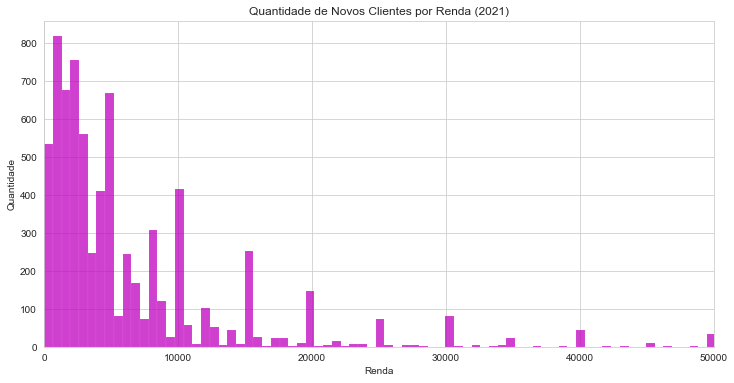

In [46]:
# Plotando o mesmo gráfico, dessa vez para público Novo por Renda em 2021
plt.figure(figsize=(12,6))
sns.histplot(ncdf["Renda"], color="m")
# Limitamos a escala, pois a maioria dos clientes tinha a renda entre 0 50mil.
# Sendo assim, a visualização fica mais clara com esse fit. 
plt.xlim(0 * 1000, 50 * 1000)
plt.xlabel("Renda")
plt.ylabel("Quantidade")
plt.title("Quantidade de Novos Clientes por Renda (2021)")
plt.show()

In [47]:
# Repetindo, separando o público por Total de Investimentos Declarados
ncdf2 = cdf.sort_values(by="Investimentos")
ncdf2.tail(30)

,Renda,Investimentos,Idade
748,30000.00,5500000.0,50
3488,15500.00,5600000.0,41
5042,30000.00,5800000.0,31
6159,35000.00,6000000.0,33
5550,30000.00,6000000.0,38
187,100000.00,6000000.0,64
2230,70000.00,7000000.0,71
471,50000.00,7000000.0,49
4528,50000.00,8000000.0,41
415,60000.00,8000000.0,64


In [48]:
# Restringindo os valores de investimentos, retirando os outliers. 
ncdf2 = cdf.drop(cdf[cdf.Investimentos > 8000000.0].index)

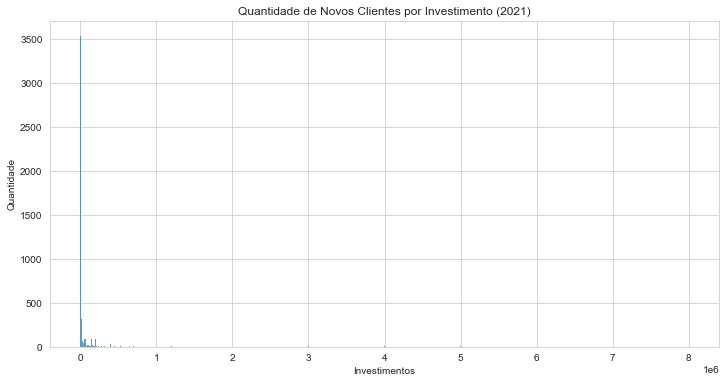

In [49]:
# Público por Investimento
plt.figure(figsize=(12,6))
sns.histplot(ncdf2["Investimentos"])
#plt.xlim(0 * 10000, 80 * 10000)
plt.xlabel("Investimentos")
plt.ylabel("Quantidade")
plt.title("Quantidade de Novos Clientes por Investimento (2021)")
plt.show()

Podemos ver que a maioria têm invetido entre 0 e 0,5mi, então vamos cortar o df, para dar um zoom nessa região. 

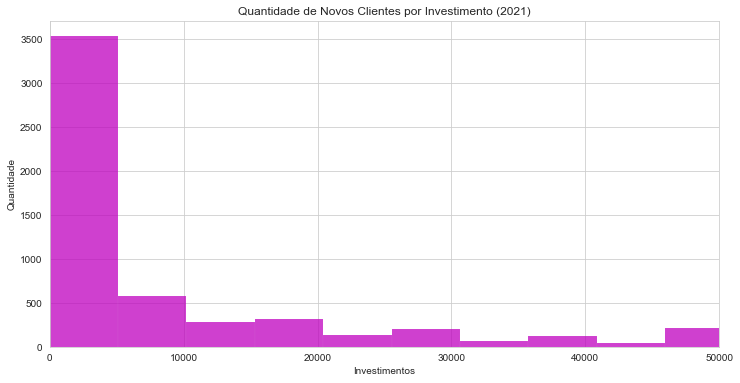

In [50]:
plt.figure(figsize=(12,6))
sns.histplot(ncdf2["Investimentos"], color="m")
plt.xlim(0 * 1000, 50 * 1000)
plt.xlabel("Investimentos")
plt.ylabel("Quantidade")
plt.title("Quantidade de Novos Clientes por Investimento (2021)")
plt.show()

##### Como cada público impacta na arrecadação, qual o público que arrecada mais?

In [51]:
# Selecionando os dados e salvando em um df
customers_arrec = pd.read_sql_query(r"""
                            SELECT MonthlyIncome AS Renda, 
                                FinancialInvestmentsValue AS Investimentos, 
                                Age AS Idade, AUM AS Total
                            FROM Customers
                            WHERE Age != 0
""", cnx)
# Retiramos da análise clientes com idade igual a zero, pois pode significar dados faltantes. 

In [52]:
arrec = pd.DataFrame(customers_arrec)

In [53]:
arrec

,Renda,Investimentos,Idade,Total
0,250.0,3000.0,14,601.525833
1,8000.0,180000.0,35,1798.831206
2,4500.0,0.0,32,1621.043680
3,18000.0,120000.0,34,78643.814178
4,2000.0,45000.0,29,422.691159
...,...,...,...,...
26993,3000.0,6000.0,25,1546.502525
26994,11400.0,0.0,34,136152.969554
26995,3500.0,1000.0,34,568.375766
26996,1200.0,0.0,27,7860.215845


In [54]:
arrec_idade = arrec.sort_values(by="Total")

In [55]:
# Criando uma coluna com faixas etárias
age_bins = [0, 19.99, 29.99, 39.99, 49.99, 50.99, 999]
age_bracket = ["Menos de 20", "20 a 30", "30 a 40", "40 a 50", "50 a 60", "Mais de 60"]

arrec_idade["Range de Idades"] = pd.cut(arrec_idade["Idade"], age_bins, labels=age_bracket)

# Cálculo da soma por faixa etária
idade_conta = arrec_idade["Range de Idades"].unique()
arrec_idade = arrec_idade.groupby(["Range de Idades"]).sum()["Total"].rename("Total Arrecadado Por Idade")

# Criando o novo df
idade = pd.DataFrame({"Total Arrecadado por Idade" : arrec_idade,
                     "Range de Idades" : idade_conta})

In [56]:
idade.sort_index

<bound method DataFrame.sort_index of                  Total Arrecadado por Idade Range de Idades
Range de Idades                                            
Menos de 20                    7.913352e+06         20 a 30
20 a 30                        1.544207e+08         30 a 40
30 a 40                        5.339506e+08     Menos de 20
40 a 50                        5.241045e+08      Mais de 60
50 a 60                        4.228697e+07         40 a 50
Mais de 60                     1.062227e+09         50 a 60>

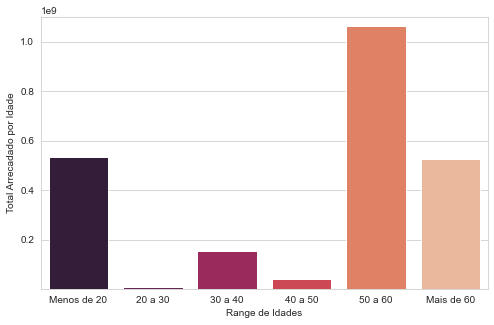

In [57]:
# Plotando os resultados eum um gráfico
plt.figure(figsize=(8,5))
g8 = sns.barplot(x="Range de Idades", y="Total Arrecadado por Idade", data=idade, ci=None, palette="rocket")
plt.ylim(1e+06, 1.1e+09)

plt.show()

In [58]:
# Repetindo a mesma análise separando o público por investimento
arrec_invest = arrec.sort_values(by="Investimentos")
arrec_invest

,Renda,Investimentos,Idade,Total
13498,6000.0,0.0,24,0.000000e+00
8750,3000.0,0.0,33,5.474415e+03
8751,1400.0,0.0,30,3.071532e+02
8753,2000.0,0.0,33,4.060336e+02
8754,2600.0,0.0,30,2.117315e+02
...,...,...,...,...
14054,10000.0,120000000.0,30,3.072698e+03
17958,6500.0,165000000.0,39,1.303107e+05
2668,6000.0,180000000.0,57,6.431284e+04
6933,75000.0,200000000.0,67,1.500947e+07


In [59]:
# Criando uma coluna com faixas de valores investidos
invest_bins = [-0.99, 0.99e+02, 0.99e+03, 0.99e+04, 0.99e+05, 0.99e+06, 5.99e+09]
invest_bracket = ["Até 100", "Até 1000", "Até 10,000", "Até 100,000", "Até 1,000,000", "Mais de 1,000,000"]

arrec_invest["Valor Investimentos"] = pd.cut(arrec_invest["Investimentos"], invest_bins, labels=invest_bracket)

In [60]:
arrec_invest.sort_values(by="Total")

,Renda,Investimentos,Idade,Total,Valor Investimentos
13498,6000.0,0.0,24,0.000000e+00,Até 100
10799,2000.0,0.0,29,0.000000e+00,Até 100
3628,1000.0,1000.0,17,0.000000e+00,"Até 10,000"
9282,5000.0,1000.0,39,0.000000e+00,"Até 10,000"
17293,1000.0,0.0,18,0.000000e+00,Até 100
...,...,...,...,...,...
5869,15000.0,0.0,58,2.390655e+07,Até 100
10548,30000.0,10000000.0,58,4.542509e+07,"Mais de 1,000,000"
11104,50000.0,0.0,65,6.305006e+07,Até 100
12886,65000.0,80000.0,75,1.301668e+08,"Até 100,000"


In [61]:
# Cálculo baseado na divisão por Faixa de Investimentos
invest_conta = arrec_invest["Valor Investimentos"].unique()
arrec_invest_novo = arrec_invest.groupby(["Valor Investimentos"]).sum()["Total"].rename("Total Arrecadado Por Total de Investimentos")

# Criando o novo df
investimento = pd.DataFrame({"Total Arrecadado Por Total de Investimentos" : arrec_invest_novo,
                             "Valor Investido" : invest_conta})

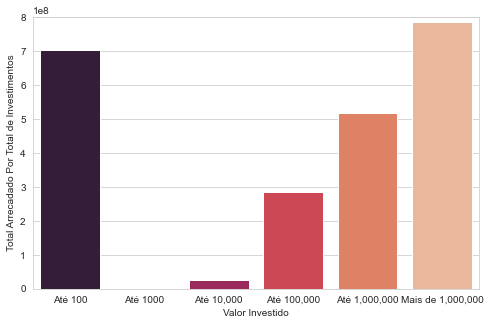

In [62]:
# Plotando o gráfico dessas informações
plt.figure(figsize=(8,5))
sns.barplot(x="Valor Investido", y="Total Arrecadado Por Total de Investimentos", 
            data=investimento, ci=None, palette="rocket")
plt.ylim(0, 8e+08)
plt.show()

O grande volume de arrecadação até 100 refere-se a pessoas quem tem 0 como valor declarado de investimentos. Esse erro pode ser falta de preenchimento de dados no momento do cadastro, como investimentos não declarados. 

In [63]:
# Repetindo a mesma análise para faixas de renda
arrec_renda = arrec.sort_values(by="Renda")
arrec_renda

,Renda,Investimentos,Idade,Total
22112,0.0,5000.0,21,106.588324
21359,0.0,0.0,23,87.849998
467,0.0,0.0,19,1195.598382
3656,0.0,0.0,20,1992.477820
13988,0.0,1185000.0,33,617003.490894
...,...,...,...,...
1260,18000000.0,200000.0,31,93641.968676
14499,20000000.0,642000.0,75,740229.823129
14316,25000000.0,2500000.0,42,461288.797058
15562,25000000.0,0.0,62,0.000000


In [64]:
# Criando uma coluna com faixas etárias
renda_bins = [-0.99, 1e+02, 1e+03, 1e+04, 1e+05, 1e+06, 1e+09]
renda_bracket = ["Até 100", "Até 1,000", "Até 10,000", "Até 100,000", "Até 1,000,000", "Mais de 1,000,000"]

arrec_renda["Faixas de Renda"] = pd.cut(arrec_renda["Renda"], renda_bins, labels=renda_bracket)

In [65]:
arrec_renda

,Renda,Investimentos,Idade,Total,Faixas de Renda
22112,0.0,5000.0,21,106.588324,Até 100
21359,0.0,0.0,23,87.849998,Até 100
467,0.0,0.0,19,1195.598382,Até 100
3656,0.0,0.0,20,1992.477820,Até 100
13988,0.0,1185000.0,33,617003.490894,Até 100
...,...,...,...,...,...
1260,18000000.0,200000.0,31,93641.968676,"Mais de 1,000,000"
14499,20000000.0,642000.0,75,740229.823129,"Mais de 1,000,000"
14316,25000000.0,2500000.0,42,461288.797058,"Mais de 1,000,000"
15562,25000000.0,0.0,62,0.000000,"Mais de 1,000,000"


In [66]:
# Cálculo baseado nessas faixas
renda_conta = arrec_renda["Faixas de Renda"].unique()
arrec_renda_novo = arrec_renda.groupby(["Faixas de Renda"]).sum()["Total"].rename("Total Arrecadado Por Faixa de Renda")

# Criando o novo df
renda = pd.DataFrame({"Total Arrecadado Por Faixas de Renda" : arrec_renda_novo,
                             "Faixas de Renda" : renda_conta})

In [67]:
renda

,Total Arrecadado Por Faixas de Renda,Faixas de Renda
Faixas de Renda,,
Até 100,2.218655e+07,Até 100
"Até 1,000",1.640484e+07,"Até 1,000"
"Até 10,000",7.298154e+08,"Até 10,000"
"Até 100,000",1.470177e+09,"Até 100,000"
"Até 1,000,000",8.263768e+07,"Até 1,000,000"
"Mais de 1,000,000",3.681652e+06,"Mais de 1,000,000"


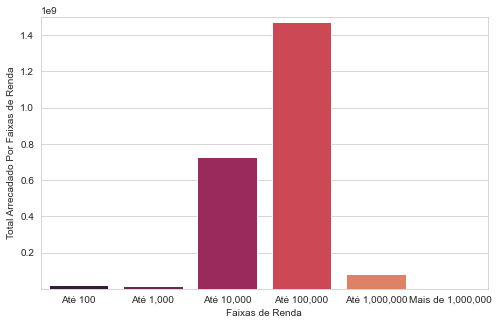

In [68]:
# Plotando um gráfico com essas informações
plt.figure(figsize=(8,5))
sns.barplot(x="Faixas de Renda", y="Total Arrecadado Por Faixas de Renda", 
            data=renda, ci=None, palette="rocket")
plt.ylim(1e+06, 1.5e+09)

plt.show()

Quem mais arrecada: 
- entre 50 e 60 anos; 
- com 0 de valor declarado investido ou com mais de 1mi investido; 
- com faixa de renda até 100mil

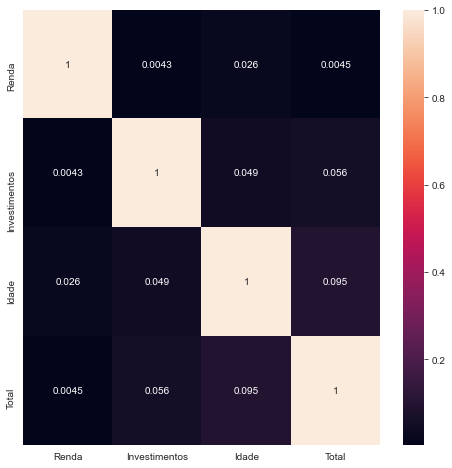

In [69]:
# Verificando correlação entre os dados
plt.figure(figsize=(8,8))
sns.heatmap(arrec.corr(), annot=True)
plt.show()
# Baixíssima 

##### Quantos depósitos cada cliente faz em média por período de tempo? Essa taxa muda por público?

In [70]:
# Selecionando os dados e criando o novo df 
deposits_query = pd.read_sql_query(r"""
                                        SELECT Direction, MONTH(OperatedAt) as Mês, customerid
                                        FROM Transactions
                                        WHERE Direction = 10
                                        ORDER BY Mês
""", cnx)

In [71]:
deposits = pd.DataFrame(deposits_query)

In [72]:
deposits

,Direction,Mês,customerid
0,10,1,148082
1,10,1,91849
2,10,1,149173
3,10,1,127746
4,10,1,148746
...,...,...,...
120966,10,7,192898
120967,10,7,192293
120968,10,7,185831
120969,10,7,153001


In [73]:
# Criando uma coluna com o número de depósitos a partir da contagem de vezes que cada cliente aparece
deposits["n_depositos"] = deposits["customerid"].value_counts()

In [74]:
# Fazendo a média e salvando em um novo df
deposits_mean = deposits.groupby(["Mês"]).mean()["n_depositos"].rename("Média de Depósitos")

In [75]:
deposits_mean_df = pd.DataFrame(deposits_mean)

In [76]:
deposits_mean_df

,Média de Depósitos
Mês,
1,6.412084
2,6.056714
3,5.888039
4,5.977632
5,6.019704
6,5.817542
7,5.636538


A média de depósitos é de 6 por mês por cliente; 

In [77]:
# Repetindo a análise anterior separando o público por idade 
deposits_idade_query = pd.read_sql_query(r"""
                                    SELECT t.customerid, c.Age AS Idade
                                        FROM Transactions AS t
                                        INNER JOIN Customers AS c
                                            ON t.customerid = c.customerid
                                        WHERE MONTH(t.OperatedAt) = 4 AND t.Direction = 10
""", cnx)
# Pegamos um mês como período de tempo, nesse caso o mês 4, para o qual o número de depósitos era próximo
# aos demais meses. 

In [78]:
deposits_idade = pd.DataFrame(deposits_idade_query)

In [79]:
deposits_idade

,customerid,Idade
0,7597,31
1,16185,31
2,35402,28
3,21478,38
4,66188,39
...,...,...
18415,171130,46
18416,171130,46
18417,8210,24
18418,8210,24


In [80]:
deposits_idade["n_depositos"] = deposits_idade["customerid"].value_counts()

In [81]:
deposits_idade_mean = deposits_idade.groupby(["Idade"]).mean()["n_depositos"].rename("Média de Depósitos por Idade")
coluna_idades = deposits_idade["Idade"].unique()

In [82]:
deposits_idade_mean_df = pd.DataFrame({"Média de Depósitos por Idade": deposits_idade_mean,
                                       "Idades": coluna_idades})

In [83]:
deposits_idade_mean_df.head(5)

,Média de Depósitos por Idade,Idades
Idade,,
0,3.0,31
1,NaN,28
2,NaN,38
3,1.0,39
4,NaN,27


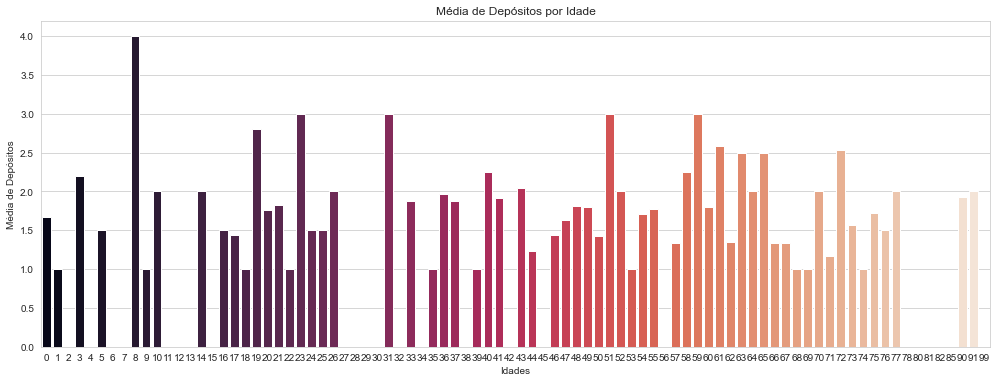

In [84]:
plt.figure(figsize=(17,6))
sns.barplot(
    data=deposits_idade_mean_df,
    x="Idades", y="Média de Depósitos por Idade",
    palette="rocket")
plt.xlabel("Idades")
plt.ylabel("Média de Depósitos")
plt.title("Média de Depósitos por Idade")
plt.show()

Ao separar o público por idade a média cai para 2. 

In [85]:
# Repetindo a análise anterior, mas separando o púlbico por Renda
deposits_renda_query = pd.read_sql_query(r"""
                                    SELECT t.customerid, c.MonthlyIncome AS Renda
                                        FROM Transactions AS t
                                        INNER JOIN Customers AS c
                                            ON t.customerid = c.customerid
                                        WHERE MONTH(t.OperatedAt) = 4 AND t.Direction = 10
""", cnx)

In [86]:
deposits_renda = pd.DataFrame(deposits_renda_query)

In [87]:
deposits_renda

,customerid,Renda
0,7597,8800.0
1,16185,3150.0
2,35402,7150.0
3,21478,16000.0
4,66188,9000.0
...,...,...
18415,171130,10000.0
18416,171130,10000.0
18417,8210,4100.0
18418,8210,4100.0


In [88]:
deposits_renda["n_depositos"] = deposits_renda["customerid"].value_counts()

In [89]:
deposits_renda_mean = deposits_renda.groupby(["Renda"]).mean()["n_depositos"].rename("Média de Depósitos por Renda")
coluna_rendas = deposits_renda["Renda"].unique()

In [90]:
deposits_renda_mean_df = pd.DataFrame({"Média de Depósitos por Renda": deposits_renda_mean,
                                       "Rendas": coluna_rendas})

(0.0, 50000.0)

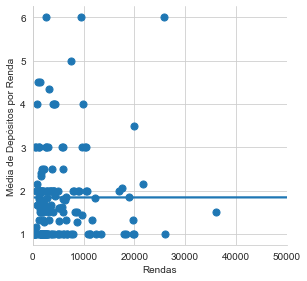

In [91]:
# Plotando as informações em um gráfico de dispersão
sns.lmplot(x="Rendas", y="Média de Depósitos por Renda", data=deposits_renda_mean_df,
           ci=None, palette="rocket", height=4,
           scatter_kws={"s": 50, "alpha": 1})
plt.xlim(0 * 1000, 50 * 1000)

In [92]:
# Fazendo a mesma análise para os Investimentos
deposits_investimentos_query = pd.read_sql_query(r"""
                                    SELECT t.customerid, c.FinancialInvestmentsValue AS Investimentos
                                        FROM Transactions AS t
                                        INNER JOIN Customers AS c
                                            ON t.customerid = c.customerid
                                        WHERE MONTH(t.OperatedAt) = 4 AND t.Direction = 10
""", cnx)

In [93]:
deposits_investimentos = pd.DataFrame(deposits_investimentos_query)

In [94]:
deposits_investimentos["n_depositos"] = deposits_investimentos["customerid"].value_counts()

In [95]:
deposits_investimentos_mean = deposits_investimentos.groupby(["Investimentos"]).mean()["n_depositos"].rename("Média de Depósitos por Investimento")
coluna_investimentos = deposits_investimentos["Investimentos"].unique()

In [96]:
deposits_investimentos_mean_df = pd.DataFrame({"Média de Depósitos por Investimentos": deposits_investimentos_mean,
                                               "Investimentos": coluna_investimentos})

(0.0, 50000.0)

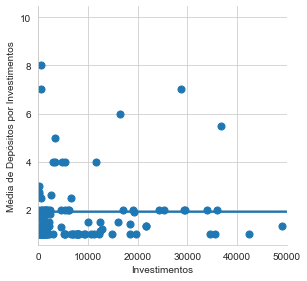

In [97]:
sns.lmplot(x="Investimentos", y="Média de Depósitos por Investimentos", data=deposits_investimentos_mean_df,
           ci=None, palette="rocket", height=4,
           scatter_kws={"s": 50, "alpha": 1})
plt.xlim(0 * 1000, 50 * 1000)

Ao separar por renda e investimenos a média também se mantém em 2. 

##### Tendo em vista os clientes que retiram o dinheiro da Warren, quantas pessoas zeram suas quantias na Warren? Existe um público dominante?

In [98]:
# Realizando a consulta aos dados
zerado_total = pd.read_sql_query(r"""
                                    SELECT AUM, COUNT(1) AS Total_Zeradas
                                    FROM Customers
                                    WHERE AUM = 0 
""", cnx)

In [99]:
# Total de contas zeradas na Warren
zerado_total

,AUM,Total_Zeradas
0,0.0,4780


In [100]:
# Consultando os dados dessa vez reunindo os públicos
zerado_query = pd.read_sql_query(r"""
                                    SELECT Age AS Idade, monthlyincome AS Renda, 
                                    FinancialInvestmentsValue AS Total_Investido
                                    FROM Customers
                                    WHERE AUM = 0 
""", cnx)

In [101]:
zerado = pd.DataFrame(zerado_query)

In [102]:
zerado

,Idade,Renda,Total_Investido
0,22,2500.0,0.0
1,38,1500.0,0.0
2,36,0.0,900.0
3,24,1600.0,100.0
4,34,11000.0,370000.0
...,...,...,...
4775,33,12600.0,10000.0
4776,24,2000.0,800.0
4777,31,300.0,0.0
4778,26,1500.0,0.0


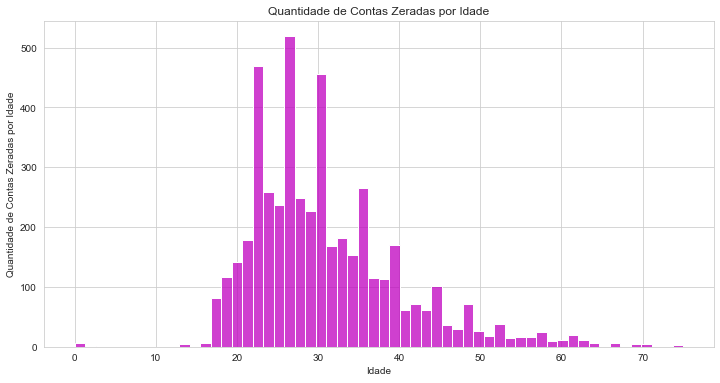

In [103]:
# Plotando a quantidade de Contas Zeradas por Idade
plt.figure(figsize=(12,6))
sns.histplot(zerado["Idade"], color="m")
plt.xlabel("Idade")
plt.ylabel("Quantidade de Contas Zeradas por Idade")
plt.title("Quantidade de Contas Zeradas por Idade")
plt.show()

In [104]:
zerado.sort_values(by="Renda")

,Idade,Renda,Total_Investido
3120,31,0.0,500.0
3098,47,0.0,4000.0
2476,18,0.0,40.0
3932,22,0.0,0.0
2686,23,0.0,0.0
...,...,...,...
3013,43,1000000.0,50000000.0
3066,27,2890000.0,1000.0
1800,0,8927000.0,0.0
1374,32,11000000.0,0.0


In [105]:
# Repetindo o mesmo recorte realizado outras vezes
nzerado = zerado.drop(zerado[zerado.Renda > 7.080332e+05].index)

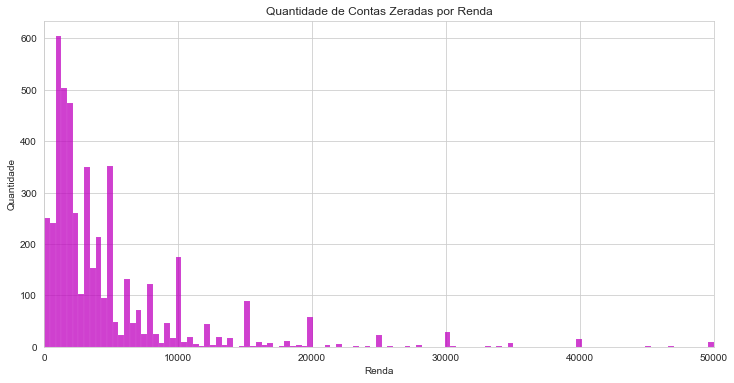

In [106]:
# Gráfico da Quantidade de Contas Zeradas por Renda
plt.figure(figsize=(12,6))
sns.histplot(nzerado["Renda"], color="m")
# Limitamos a escala, pois a maioria dos clientes tem renda abaixo de 50mil.
# Sendo assim, a visualização fica mais clara com esse fit. 
plt.xlim(0 * 1000, 50 * 1000)
plt.xlabel("Renda")
plt.ylabel("Quantidade")
plt.title("Quantidade de Contas Zeradas por Renda")
plt.show()

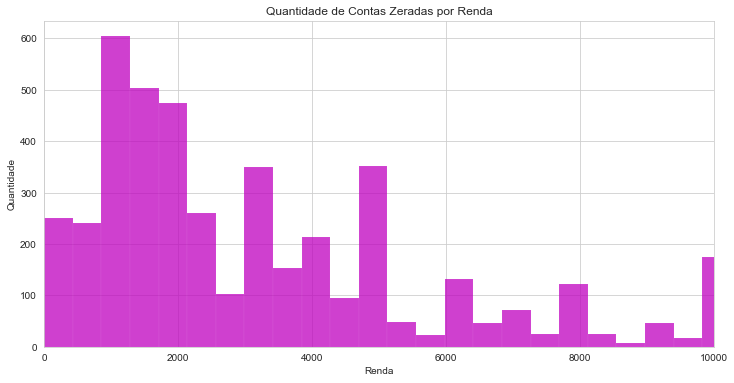

In [107]:
# Dando um "zoom" no gráfico
plt.figure(figsize=(12,6))
sns.histplot(nzerado["Renda"], color="m")
# Limitamos a escala, pois a maioria dos clientes que zeraram as contas estavam abaixo de 10mil.
# Sendo assim, a visualização fica mais clara com esse fit. 
plt.xlim(0 * 100, 100 * 100)
plt.xlabel("Renda")
plt.ylabel("Quantidade")
plt.title("Quantidade de Contas Zeradas por Renda")
plt.show()

In [108]:
# Repetindo o recorte realizado outras vezes
nzerado2 = zerado.drop(zerado[zerado.Total_Investido > 8000000.0].index)

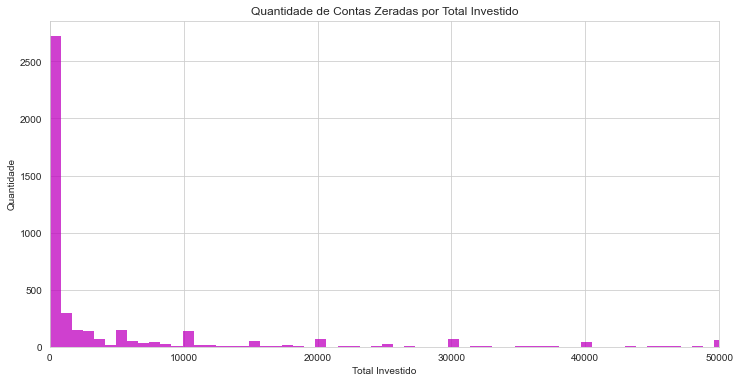

In [205]:
# Gráfico da Quantidade de Contas zeradas por Total Investido
plt.figure(figsize=(12,6))
sns.histplot(nzerado2["Total_Investido"], color="m")
plt.xlim(0 * 1000, 50 * 1000)
plt.xlabel("Total Investido")
plt.ylabel("Quantidade")
plt.title("Quantidade de Contas Zeradas por Total Investido")
plt.show()

In [ ]:
# Eliminando os clientes com total investido = 0, pois podem significar missing values.
nzerado3 = nzerado2.drop(nzerado2[nzerado2.Total_Investido < 1.0].index)

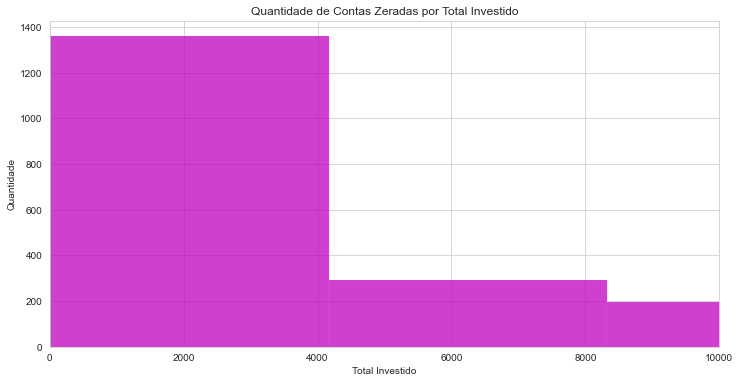

In [113]:
# Refazendo o gráfico
plt.figure(figsize=(12,6))
sns.histplot(nzerado3["Total_Investido"], color="m")
plt.xlim(0 * 1000, 10 * 1000)
plt.xlabel("Total Investido")
plt.ylabel("Quantidade")
plt.title("Quantidade de Contas Zeradas por Total Investido")
plt.show()
# O resultado segue o mesmo, maioria de contas zeradas em pessoas com investimentos até 4mil.

### Sugestão de Desenvolvimento de Canal

Analisando os gráficos anteriores vemos que os públicos que menos arrecadam e mais zeram suas contas são: 
- Entre 20 e 30 anos de idade; 
- Renda entre 100 e 10mil; 
- Investimentos até 1mil. 

Podemos investigar então qual plataforma esse público usa para acessar.
Melhorar o modo de acesso pode ajudar essas pessoas a não zerarem as contas e aumentarem a sua arrecadação. 

In [206]:
# Consultando quais canais o público entre 20 e 30 anos utiliza 
platform_idade = pd.read_sql_query(r"""
                                SELECT e.Platform AS Plataforma
                                FROM Events AS e
                                INNER JOIN Customers AS c
                                    ON e.CustomerApiid = c.CustomerApiid
                                WHERE c.Age BETWEEN 20 AND 30
""", cnx)

In [207]:
platform_idade.value_counts()

Plataforma
ANDROID       203713
IOS           128188
WEB           124973
dtype: int64

In [208]:
# Quais canais o público com renda entre 100 e 10000 utiliza
platform_renda = pd.read_sql_query(r"""
                                SELECT e.Platform AS Plataforma
                                FROM Events AS e
                                INNER JOIN Customers AS c
                                    ON e.CustomerApiid = c.CustomerApiid
                                WHERE c.MonthlyIncome BETWEEN 101 AND 10000
""", cnx)

In [209]:
platform_renda.value_counts()

Plataforma
ANDROID       392422
WEB           274344
IOS           212347
dtype: int64

In [210]:
# Qual canal o público com Total Investido entre 0 e 1000 utiliza
platform_invest = pd.read_sql_query(r"""
                                SELECT e.Platform AS Plataforma
                                FROM Events AS e
                                INNER JOIN Customers AS c
                                    ON e.CustomerApiid = c.CustomerApiid
                                WHERE c.FinancialInvestmentsValue BETWEEN 0 AND 1000
""", cnx)

In [211]:
platform_invest.value_counts()

Plataforma
ANDROID       213148
WEB           178451
IOS           116590
dtype: int64

Em todos os públicos, o meio mais usado de acesso é a plataforma Android. Pode significar um problema com a plataforma. 